In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys

from CNN import CNN, train, test, plot_confusion_matrix
import torch
import timeit
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sizes = [28, 14, 7, 4]
sd = [0.005, 0.05, 0.1, 0.25, 0.5]
train_data = [[None, None, None, None, None],
             [None, None, None, None, None],
             [None, None, None, None, None],
             [None, None, None, None, None]]

loss_data = [[None, None, None, None, None],
             [None, None, None, None, None],
             [None, None, None, None, None],
             [None, None, None, None, None]]

test_data = [[None, None, None, None, None],
             [None, None, None, None, None],
             [None, None, None, None, None],
             [None, None, None, None, None]]

cmt = [[None, None, None, None, None],
       [None, None, None, None, None],
       [None, None, None, None, None],
       [None, None, None, None, None]]

cnn = [[None, None, None, None, None],
       [None, None, None, None, None],
       [None, None, None, None, None],
       [None, None, None, None, None]]


for i in range(len(cnn)):
    for j in range(len(sd)):
        cnn[i][j] = CNN(img_shape = sizes[i], noise = True, sd = sd[j])

/Users/cristianespinosa/opt/anaconda3/envs/tensor/lib/python3.6/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1631631159818/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
len(cnn)

4

In [5]:
epochs = 100
for i in range(len(cnn)):
    for j in range(len(sd)):
        start = timeit.default_timer()
        train_data[i][j], loss_data[i][j] = train(cnn[i][j], cnn[i][j].loaders, epochs)
        end = timeit.default_timer()
        time = np.round((end - start) / 60, 2)
        print('Training completion time: ', time, 'minutes\n')


        start = timeit.default_timer()
        cmt[i][j], test_data[i][j] = test(cnn[i][j], cnn[i][j].loaders)
        end = timeit.default_timer()
        time = np.round((end - start) / 60, 2)
        print('Testing completion time: ', time, 'minutes\n')

        print('Saving the models...')

        model_path = '../models/April_29th_2022/noisy_data_training/' + str(sizes[i]) + 'x' + str(sizes[i]) + '/sd_' + str(sd[j]) + '/cnn_model'
        weights_path = '../models/April_29th_2022/noisy_data_training/' + str(sizes[i]) + 'x' + str(sizes[i]) + '/sd_' + str(sd[j]) + '/cnn_weights' 
        loss_path = '../models/April_29th_2022/noisy_data_training/' + str(sizes[i]) + 'x' + str(sizes[i]) + '/sd_' + str(sd[j]) + '/loss_data'
        train_acc_path = '../models/April_29th_2022/noisy_data_training/' + str(sizes[i]) + 'x' + str(sizes[i]) + '/sd_' + str(sd[j]) + '/train_acc_data'
        test_acc_path = '../models/April_29th_2022/noisy_data_training/' + str(sizes[i]) + 'x' + str(sizes[i]) + '/sd_' + str(sd[j]) + '/test_acc_data'
        cmt_path = '../models/April_29th_2022/noisy_data_training/' + str(sizes[i]) + 'x' + str(sizes[i]) + '/sd_' + str(sd[j]) + '/confusion_matrix'
        
        
        torch.save(cnn[i][j], model_path)
        torch.save(cnn[i][j].state_dict(), weights_path)
        np.save(loss_path, loss_data[i][j])
        np.save(train_acc_path, train_data[i][j])
        np.save(test_acc_path, test_data[i][j])
        np.save(cmt_path, cmt[i][j])
        print("Done Saving\n")
    
    epochs += 50


Training...
Done training
Training completion time:  43.16 minutes

Testing...
Testing completion time:  0.06 minutes

Saving the models...
Done Saving

Training...
Done training
Training completion time:  49.63 minutes

Testing...
Testing completion time:  0.04 minutes

Saving the models...
Done Saving

Training...
Done training
Training completion time:  41.87 minutes

Testing...
Testing completion time:  0.05 minutes

Saving the models...
Done Saving

Training...
Done training
Training completion time:  48.74 minutes

Testing...
Testing completion time:  0.05 minutes

Saving the models...
Done Saving

Training...
Done training
Training completion time:  43.46 minutes

Testing...
Testing completion time:  0.04 minutes

Saving the models...
Done Saving

Training...
Done training
Training completion time:  54.44 minutes

Testing...
Testing completion time:  0.07 minutes

Saving the models...
Done Saving

Training...
Done training
Training completion time:  51.92 minutes

Testing...
Tes

In [14]:
cmt[0][0][0][0]

tensor(954)

In [20]:
total = 0
correct = 0

for i in range(4):
    for j in range(5):
        for x in range(10):
            for y in range(10):
                total += cmt[i][j][x][y]
                if x == y:
                    correct += cmt[i][j][x][y]
        accuracy = correct / total
        print("Accuracy ", sizes[i], 'x', sizes[i], ', sd = ', sd[j], ': ', accuracy )
    print("\n")

Accuracy  28 x 28 , sd =  0.005 :  tensor(0.8861)
Accuracy  28 x 28 , sd =  0.05 :  tensor(0.8891)
Accuracy  28 x 28 , sd =  0.1 :  tensor(0.8823)
Accuracy  28 x 28 , sd =  0.25 :  tensor(0.8790)
Accuracy  28 x 28 , sd =  0.5 :  tensor(0.8589)


Accuracy  14 x 14 , sd =  0.005 :  tensor(0.8097)
Accuracy  14 x 14 , sd =  0.05 :  tensor(0.7968)
Accuracy  14 x 14 , sd =  0.1 :  tensor(0.7645)
Accuracy  14 x 14 , sd =  0.25 :  tensor(0.7460)
Accuracy  14 x 14 , sd =  0.5 :  tensor(0.7126)


Accuracy  7 x 7 , sd =  0.005 :  tensor(0.6670)
Accuracy  7 x 7 , sd =  0.05 :  tensor(0.6304)
Accuracy  7 x 7 , sd =  0.1 :  tensor(0.6006)
Accuracy  7 x 7 , sd =  0.25 :  tensor(0.5706)
Accuracy  7 x 7 , sd =  0.5 :  tensor(0.5409)


Accuracy  4 x 4 , sd =  0.005 :  tensor(0.5194)
Accuracy  4 x 4 , sd =  0.05 :  tensor(0.4990)
Accuracy  4 x 4 , sd =  0.1 :  tensor(0.4841)
Accuracy  4 x 4 , sd =  0.25 :  tensor(0.4677)
Accuracy  4 x 4 , sd =  0.5 :  tensor(0.4514)




28 x 28 , sd =  0.005
Confusion matrix, without normalization


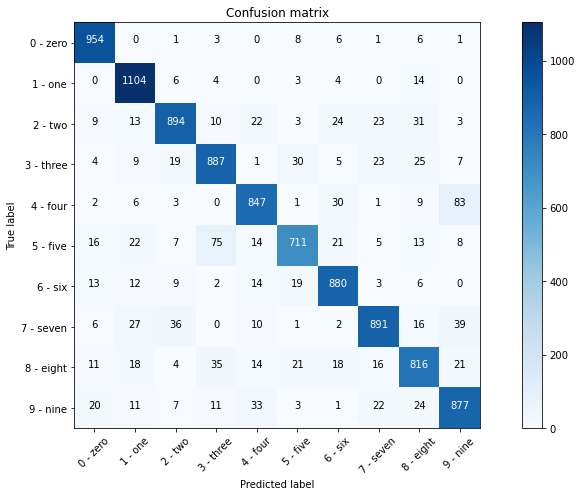

<Figure size 864x504 with 0 Axes>

28 x 28 , sd =  0.05
Confusion matrix, without normalization


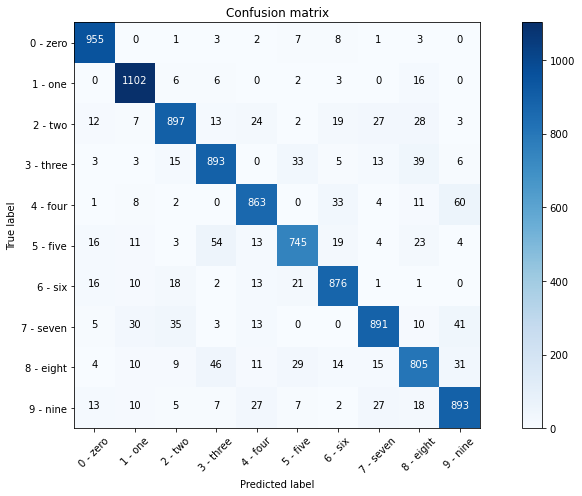

<Figure size 864x504 with 0 Axes>

28 x 28 , sd =  0.1
Confusion matrix, without normalization


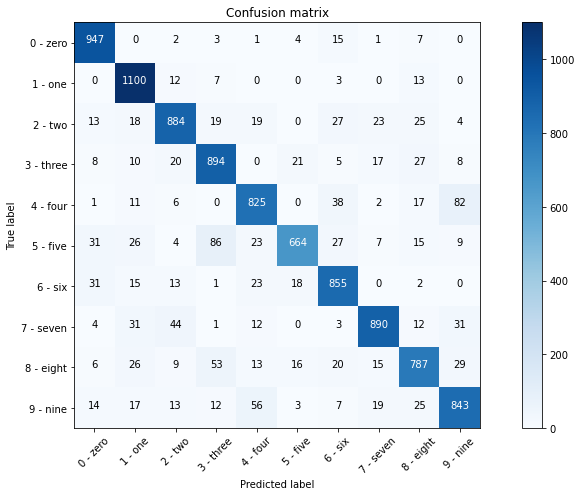

<Figure size 864x504 with 0 Axes>

28 x 28 , sd =  0.25
Confusion matrix, without normalization


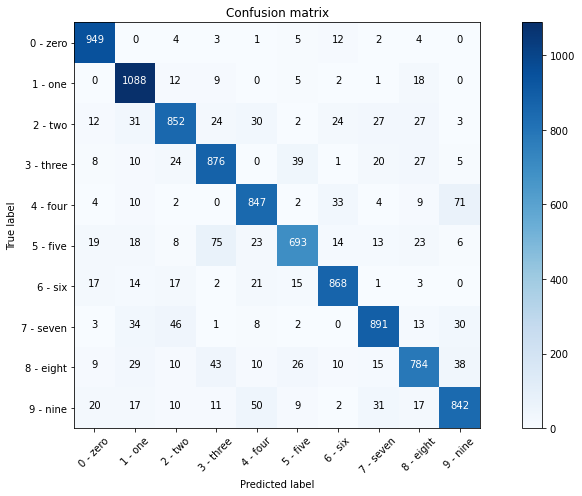

<Figure size 864x504 with 0 Axes>

28 x 28 , sd =  0.5
Confusion matrix, without normalization


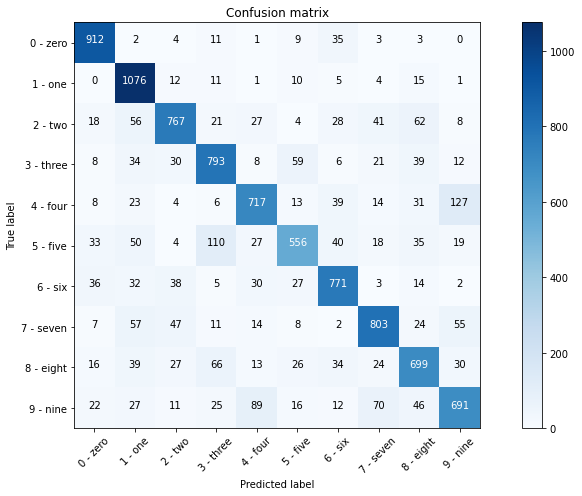

<Figure size 864x504 with 0 Axes>

14 x 14 , sd =  0.005
Confusion matrix, without normalization


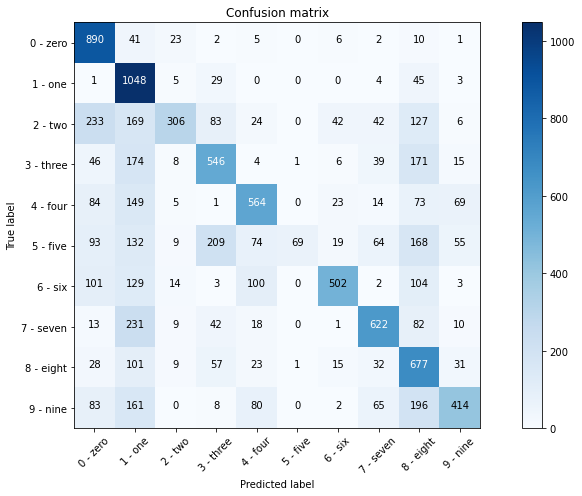

<Figure size 864x504 with 0 Axes>

14 x 14 , sd =  0.05
Confusion matrix, without normalization


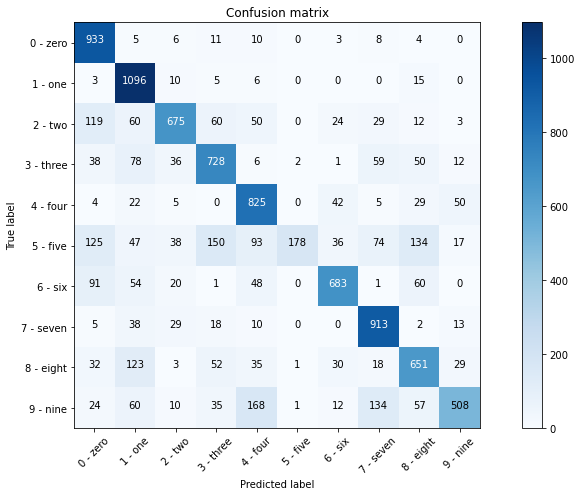

<Figure size 864x504 with 0 Axes>

14 x 14 , sd =  0.1
Confusion matrix, without normalization


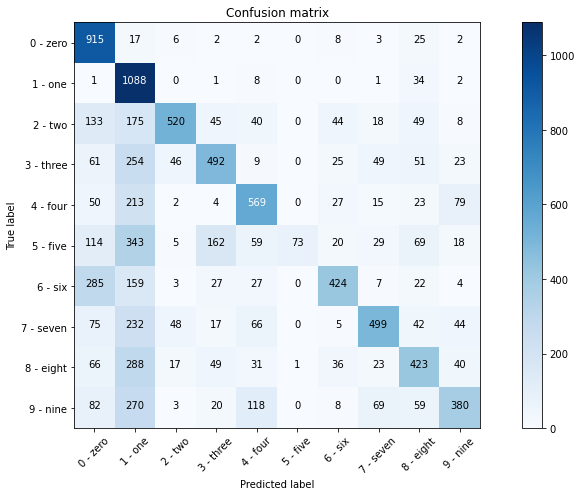

<Figure size 864x504 with 0 Axes>

14 x 14 , sd =  0.25
Confusion matrix, without normalization


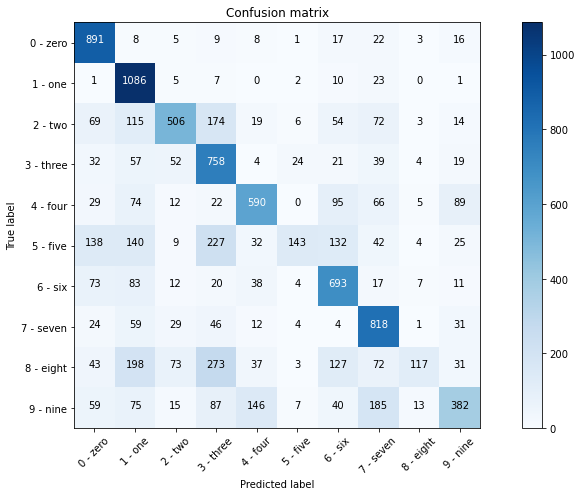

<Figure size 864x504 with 0 Axes>

14 x 14 , sd =  0.5
Confusion matrix, without normalization


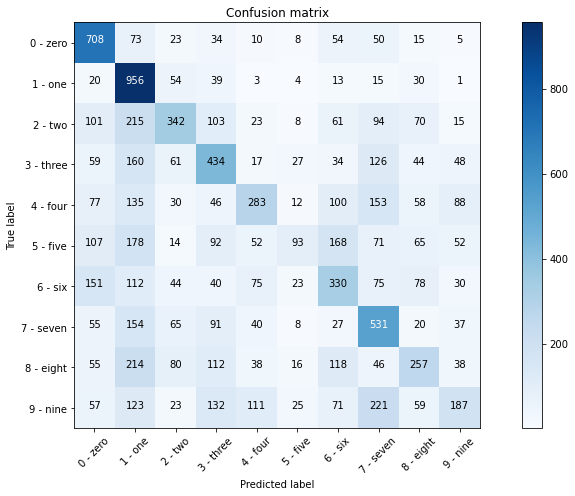

<Figure size 864x504 with 0 Axes>

7 x 7 , sd =  0.005
Confusion matrix, without normalization


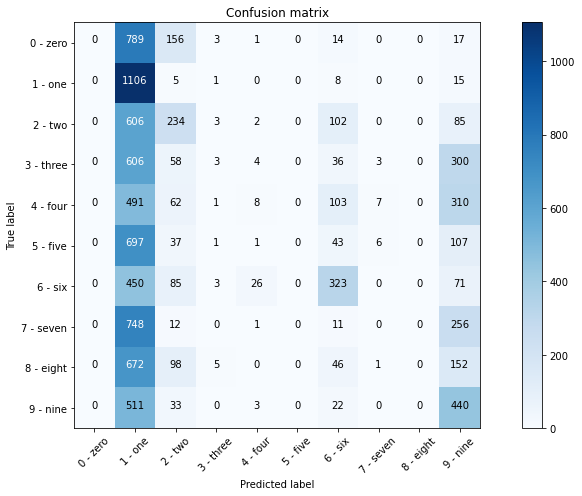

<Figure size 864x504 with 0 Axes>

7 x 7 , sd =  0.05
Confusion matrix, without normalization


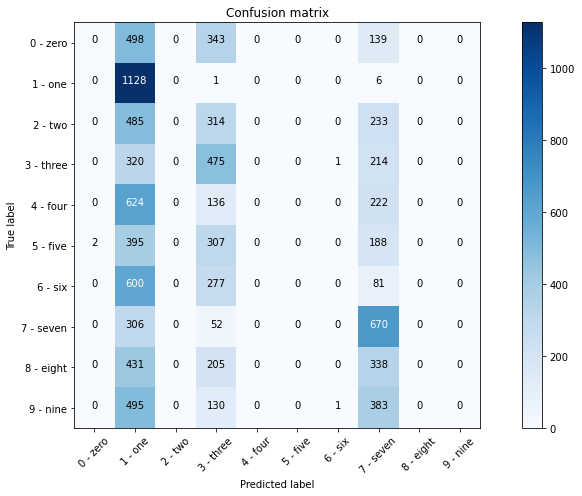

<Figure size 864x504 with 0 Axes>

7 x 7 , sd =  0.1
Confusion matrix, without normalization


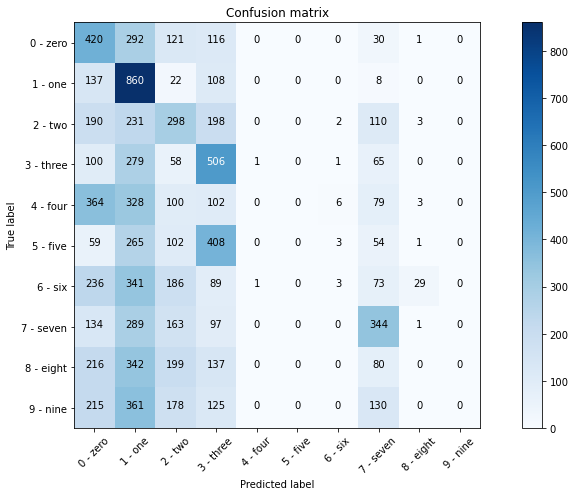

<Figure size 864x504 with 0 Axes>

7 x 7 , sd =  0.25
Confusion matrix, without normalization


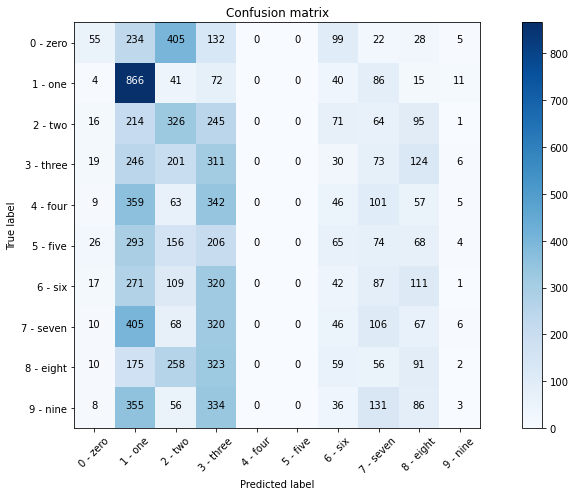

<Figure size 864x504 with 0 Axes>

7 x 7 , sd =  0.5
Confusion matrix, without normalization


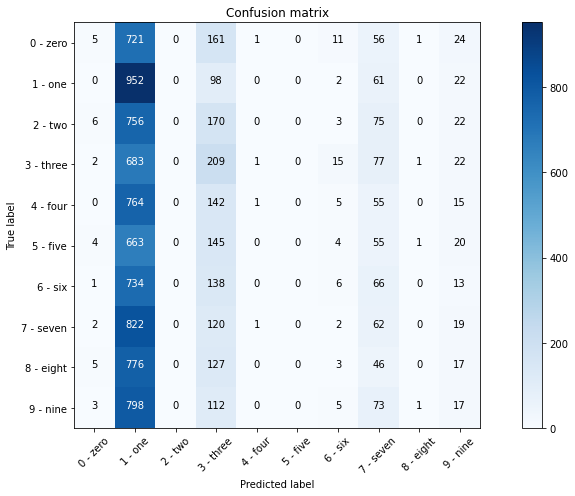

<Figure size 864x504 with 0 Axes>

4 x 4 , sd =  0.005
Confusion matrix, without normalization


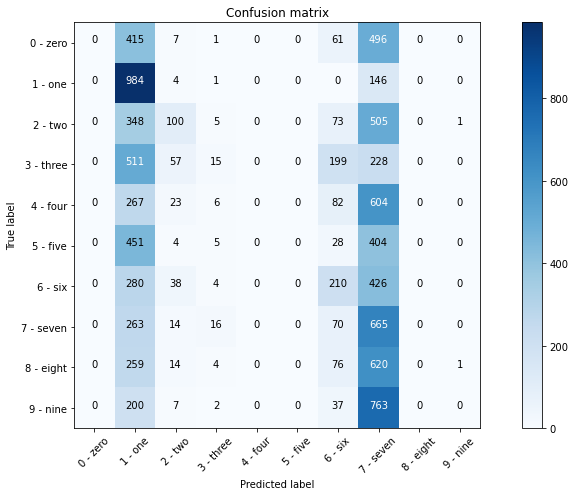

<Figure size 864x504 with 0 Axes>

4 x 4 , sd =  0.05
Confusion matrix, without normalization


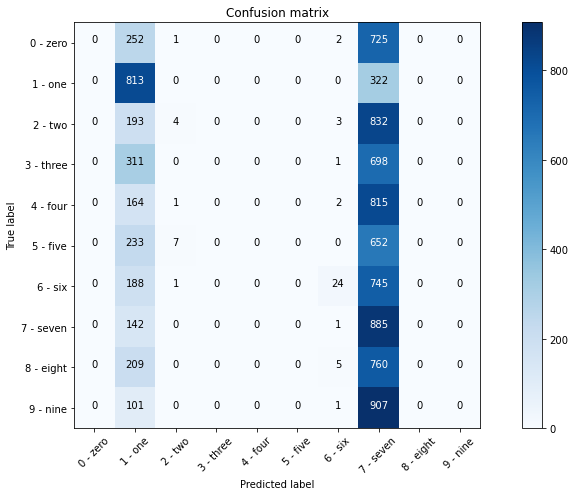

<Figure size 864x504 with 0 Axes>

4 x 4 , sd =  0.1
Confusion matrix, without normalization


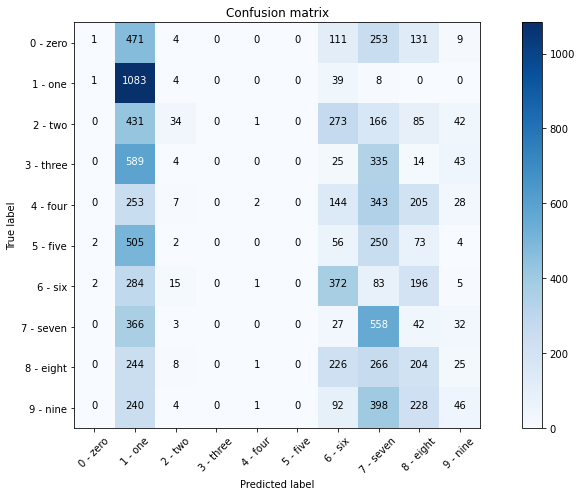

<Figure size 864x504 with 0 Axes>

4 x 4 , sd =  0.25
Confusion matrix, without normalization


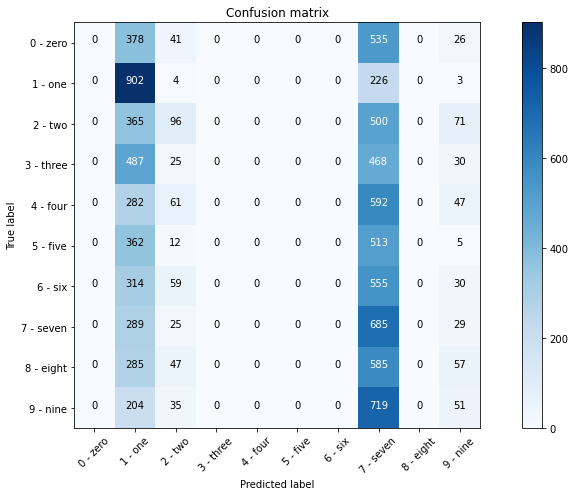

<Figure size 864x504 with 0 Axes>

4 x 4 , sd =  0.5
Confusion matrix, without normalization


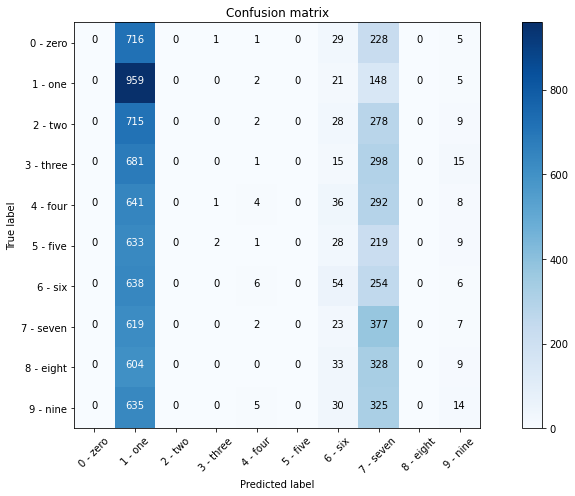

<Figure size 864x504 with 0 Axes>

In [23]:
for i in range(len(cnn)):
    for j in range(len(sd)):
        print(sizes[i], 'x', sizes[i], ', sd = ', sd[j])
        plt.figure(figsize=(12,7))
        plot_confusion_matrix(cmt[i][j],  cnn[i][j].test_data.classes)

In [ ]:
# dummy = CNN(noise = False)
# plt.imshow(dummy.train_data[0][0][0]); plt.show()
# plt.hist(dummy.train_data[0][0][0]);plt.show()

# dummy = CNN(noise = True)
# plt.imshow(dummy.train_data[0][0][0]); plt.show()
# plt.hist(dummy.train_data[0][0][0]);plt.show()

In [29]:
dummy = CNN()
dummy.test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../data/28x28
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=28, interpolation=bilinear, max_size=None, antialias=None)
               Normalize(mean=0, std=1)
           )

In [ ]:
for i in range(len(cnn)):
    for j in range(len(sd)):
        # i = 0
        # j = 0
        plt.figure(figsize=(12,7))
        path = '../models/April_29th_2022/noisy_data_training/' + str(sizes[i]) + 'x' + str(sizes[i]) + '/sd_' + str(sd[j]) + '/confusion_matrix_heatmap.png'
        plot_confusion_matrix(cmt[i][j], cnn[i][j].test_data.classes, path)
        plt.savefig(path)
        plt.show()

In [ ]:
for i in range(len(cnn)):
    for j in range(len(sd)):
        print(test_data[i][j][len(sd)-1])

In [ ]:
plt.plot(train_data[1][4])

In [ ]:
plt.figure(figsize=(12,7))
plot_confusion_matrix(cmt[1], dummy.test_data.classes)
plt.savefig('../models/April_29th_2022/confusion_matrix_14x14_with_noise.png')

In [ ]:
plt.figure(figsize=(12,7))
plot_confusion_matrix(cmt[2], dummy.test_data.classes)
plt.savefig('../models/April_29th_2022/confusion_matrix_7x7_without_noise.png')

In [ ]:
plt.figure(figsize=(12,7))
plot_confusion_matrix(cmt[3], dummy.test_data.classes)
plt.savefig('../models/April_29th_2022/confusion_matrix_4x4_without_noise.png')

In [ ]:
for i in range(len(cnn)):
    model_path = '../models/April_5th_2022/cnn_model' + str(sizes[i]) + 'x' + str(sizes[i])
    cnn[i] = torch.load(model_path)
    loss_data = np.load('../models/March_28th_2022/cnn_loss_data.npy', allow_pickle=True)
    test_data = np.load('../models/March_28th_2022/cnn_test_acc_data.npy')
    train_data = np.load('../models/March_28th_2022/cnn_train_acc_data.npy', allow_pickle=True)

In [ ]:
# dummy = CNN(noise=True)
# train(dummy, loaders = dummy.loaders, num_epochs=2)

In [ ]:
# cmt = test(dummy, dummy.loaders)

In [ ]:
# plt.figure(figsize=(10,10))
# plot_confusion_matrix(cmt, dummy.test_data.classes)

In [ ]:
# plt.imshow(dummy.train_data[2][0][0])
# print(dummy.train_data[2][1])

In [ ]:
# plt.imshow(cnn[0].train_data[2][0][0])

In [ ]:
# plt.figure(figsize = (12,7))
# sn.heatmap(test_data[0], annot=True, cmap='Blues')
# plt.savefig('../models/confusion_matrix_28x28.png')

In [ ]:
# plt.figure(figsize = (12,7))
# sn.heatmap(test_data[1], annot=True, cmap='Blues')
# plt.savefig('../models/confusion_matrix_14x14.png')

In [ ]:
# plt.figure(figsize = (12,7))
# sn.heatmap(test_data[2], annot=True, cmap='Blues')
# plt.savefig('../models/confusion_matrix_7x7.png')

In [ ]:
# plt.figure(figsize = (12,7))
# sn.heatmap(test_data[3], annot=True, cmap='Blues')
# plt.savefig('../models/confusion_matrix_4x4.png')

In [ ]:
# train_data = np.array(train_data)
# np.save('../models/cnn_train_acc_data', train_data)

# test_data = np.array(test_data)
# np.save('../models/cnn_test_acc_data', test_data)

# loss_data = np.array(loss_data)
# np.save('../models/cnn_loss_data', loss_data)

In [ ]:
# rows = 4
# cols = 2
# f, axarr = plt.subplots(rows, cols, figsize=(20, 25))
# for i in range(rows):
#     for j in range(cols):
#         if j == 0:
#             title = "Train Accuracy (" + str(sizes[i]) + "x" + str(sizes[i]) + ")"
#             axarr[i][j].set_title(title)
#             axarr[i][j].set_xlabel("Epochs")
#             axarr[i][j].set_ylabel("Accuracy")
#             axarr[i][j].plot(train_data[i])
#         else:
#             title = "Loss Data (" + str(sizes[i]) + "x" + str(sizes[i]) + ")"
#             axarr[i][j].set_title(title)
#             axarr[i][j].set_xlabel("Epochs")
#             axarr[i][j].set_ylabel("Loss")
#             axarr[i][j].plot(loss_data[i])


In [ ]:
# test_data = np.load('../models/March_28th_2022/cnn_test_acc_data.npy')
# train_data = np.load('../models/March_28th_2022/cnn_train_acc_data.npy', allow_pickle=True)

In [ ]:
j = 3
cnn = None
cm = None
for i in range(len(sd)):
    plt.figure(figsize=(12,7))
    path_cnn = '../models/April_5th_2022/noisy_data_training/' + str(sizes[j]) + 'x' + str(sizes[j]) + '/sd_' + str(sd[i]) + '/cnn_model'
    path_cm = '../models/April_5th_2022/noisy_data_training/' + str(sizes[j]) + 'x' + str(sizes[j]) + '/sd_' + str(sd[i]) + '/confusion_matrix.npy'
    test_acc_path = '../models/April_5th_2022/noisy_data_training/' + str(sizes[j]) + 'x' + str(sizes[j]) + '/sd_' + str(sd[i]) + '/test_acc_data.npy'
    test_data = np.load(test_acc_path)
    print("Accuracy: ", test_data[len(test_data)-1])
    cnn = torch.load(path_cnn)
    cm = np.load(path_cm)
    plot_confusion_matrix(cm, cnn.test_data.classes)
    print("\n")